In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [24]:
def read_results(env: str, alg: str) -> pd.DataFrame:
  root_dir = Path.cwd().parent
  results_dir = root_dir / "results" / env / alg 

  history_path = results_dir / "history.csv"
  analysis_results_path = results_dir / "analysis_results.json"

  history_df = pd.read_csv(history_path)
  with open(analysis_results_path, "r", encoding="utf-8") as f:
    analysis_results = json.load(f)
  return history_df, analysis_results

In [25]:
def render_reward_history(history_df: pd.DataFrame, env: str, alg: str) -> None:
  plt.figure(figsize=(8, 4))
  plt.plot(history_df['reward'], alpha=0.5, label='Нагорода')
  plt.plot(history_df['reward_ma'], color='red', linewidth=2, label='Рухоме середнє')
  plt.xlabel('Ітерації')
  plt.ylabel('Нагорода')
  plt.legend()
  alg_title = alg.replace('_', ' ').upper()
  env_title = env.upper()
  title = f'{env_title} {alg_title}'
  plt.title(title)
  plt.grid(True)
  plt.show()

In [26]:
def analyse_alg(env: str, alg: str) -> None:
  history_df, analysis_results = read_results(env, alg)
  history_df['reward_ma'] = history_df['reward'].rolling(window=50).mean()
  render_reward_history(history_df, env, alg)
  return analysis_results

In [37]:
def analyse() -> None:
  algs = ['mab', 'mab_decay', 'mab_exponential', 'ucb', 'gradient', 'ucb_2']
  rows = []
  for alg in algs:
    res = analyse_alg('simulation', alg)
    res['key'] = alg
    rows.append(res)

  results_df = pd.DataFrame(rows)
  return results_df.head(10)

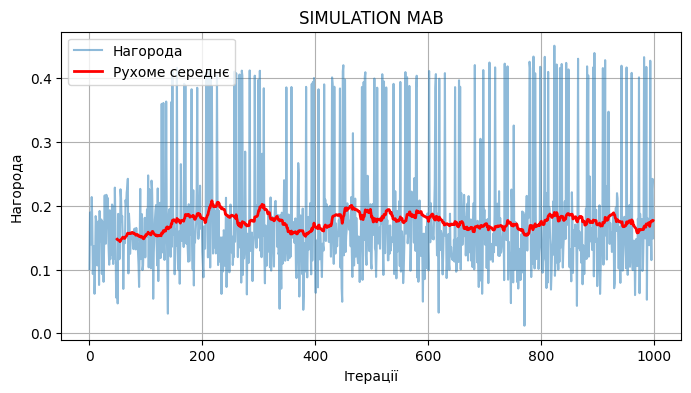

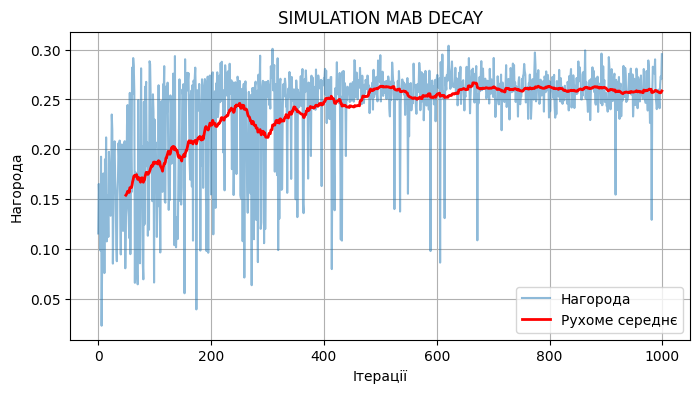

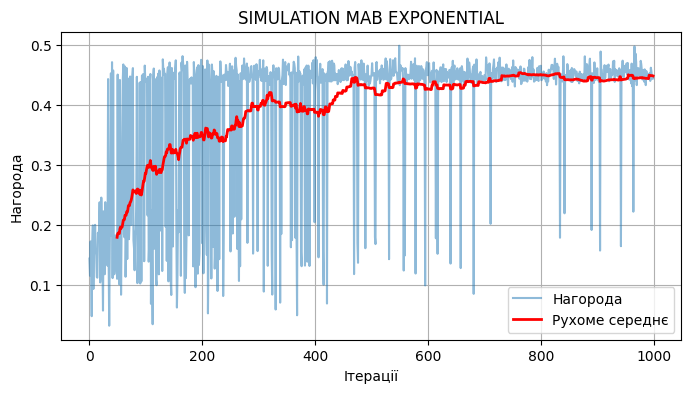

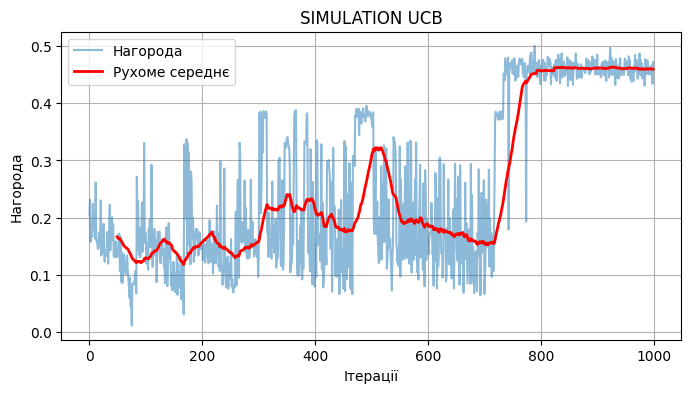

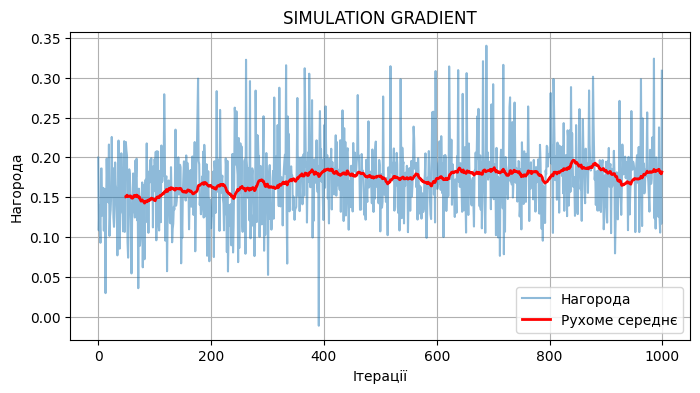

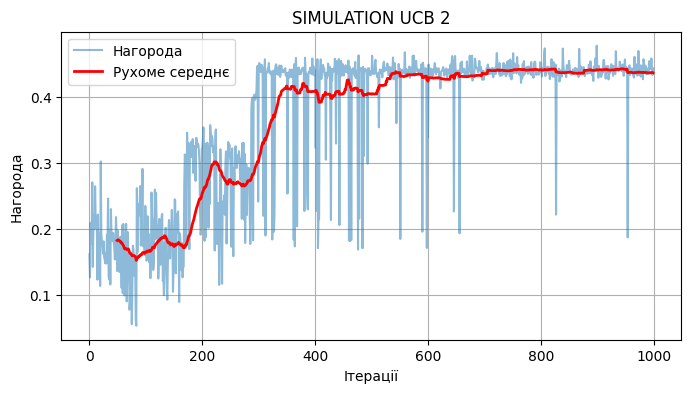

,algorithm,environment,algorithm_configs,time_diff,high_rewards,convergence_iteration,rewards_sum,highest_reward,key
0,mab,simulation,{'epsilon': 0.9},4,102,NaN,173.9302,0.4503,mab
1,mab_decay,simulation,{'epsilon': 0.01},3,0,NaN,239.7748,0.3040,mab_decay
2,mab_exponential,simulation,"{'epsilon': 0.01, 'alpha': 0.3}",3,817,187.0,396.7606,0.4982,mab_exponential
3,ucb,simulation,"{'epsilon': 0.01, 'alpha': 0.3, 'exploration_f...",5,328,754.0,258.4102,0.5003,ucb
4,gradient,simulation,"{'epsilon': 0.01, 'alpha': 0.3}",7,0,NaN,172.1798,0.3401,gradient
5,ucb,simulation,"{'epsilon': 0.01, 'alpha': 0.2, 'exploration_f...",5,677,318.0,367.8152,0.4777,ucb_2


In [38]:
analyse()